<a href="https://colab.research.google.com/github/aiguozhe01/DIC_Assignment/blob/master/Sprint_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 機械学習スクラッチ　クラスタリング

教師無し学習‐クラスタリング‐K-means（重心ベース）を理解して、NumPyなどを駆使してスクラッチする。

* k個の重心を識別し、重心位置を最適化（平均値を最小化）する。
* 上記を反復的に行い、すべてのデータ点を最も近接するクラスタに割り当てる。
* クラスタ内の誤差平方和を削減することにより、すべてのデータ点が各クラスタに割り当てられる。

In [24]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# 《シンプルデータセット3》
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    
    def __init__(self, n_clusters, n_init, max_iter=None, tol=0, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    
    
    def _mu_init(self, X):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
    
        mu = np.random.choice(len(X), self.n_clusters)

        return X[mu]
    
    
    def label_cluster(self, X, mu):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
        r = np.empty(len(X))

        for n in range(len(X)):
            dist = LA.norm((X[n] - mu), axis=1)
            label = np.argmin(dist)
            r[n] = label

        return r
    
    
    def _shift_center_mean(self, X, r):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
        k = len(np.unique(r))

        mu = np.empty((k, len(X[0])))

        for i in range(k):
            batch = X[np.where(r == i)]
            mu[i] = np.mean(batch, axis=0)

        return mu

    
    def fit(self, X, return_sse=False, verbose=False):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """

        sse = 0

        for i in range(self.n_init):

            mu = self._mu_init(X)
            r = self.label_cluster(X, mu)
            iter_ = 0

            if verbose:
                print("<Initialization {}>".format(i+1))

            while True:

                mu = self._shift_center_mean(X, r)
                r = self.label_cluster(X, mu)

                iter_ += 1
                center = self._shift_center_mean(X, r)

                # 学習過程の出力
                if verbose:
                    print("Iteration {} mean/center diff: {:.4f}".format(iter_, np.sum(np.abs(mu - center))))

                # ループ解除式
                if iter_ == self.max_iter:
                    break
                if np.sum(np.abs(mu - center)) <= self.tol:
                    break

            new_sse = 1/(1+SSE(X, mu, r))

            if new_sse > sse:
                self.mu = mu
                sse = new_sse

            if verbose:
                print("----SSE {:.4f} after {} iterations".format(1/new_sse-1, iter_))
                clusters_plot(X, mu, r)
                
        if verbose:
            print("\n")
            print("Optimal SSE: {:.4f}".format(SSE(X, self.mu, self.predict(X))))
            print("Optimal Mu: {}".format(self.mu))
        
        
        if return_sse:
            return self.mu, SSE(X, self.mu, self.predict(X))
        else:
            return self.mu
    
    
    def predict(self, X):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
        r = np.empty(len(X))

        for n in range(len(X)):
            dist = LA.norm((X[n] - self.mu), axis=1)
            label = np.argmin(dist)
            r[n] = label

        return r

    
def SSE(X, mu, r):
    """
    *Objective*

    Parameters
    ----------

    Returns
    -------
    """
    k = len(np.unique(r))
    SSE = 0

    for k in range(k):

        # rクラスの判定
        r_nk = np.where(r == k, 1, 0)
        # ユークリッド距離を計算
        dist = LA.norm((X - mu[k]), axis=1)

        # ユークリッド距離とクラス判定を掛け合わせ、合計を計算
        SSE += np.sum(r_nk * dist**2)

    return SSE

### 人口データセット

In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

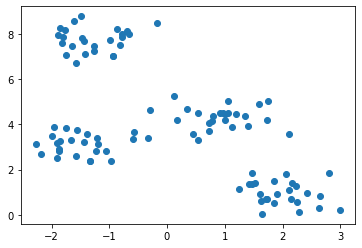

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## 【問題1】中心点の初期値を決める

* 入力されたデータ（特徴量行列X）からK個の中心点の$\mu_1$から$\mu_K$の初期値を決めるコードを作成せよ。
    * Kは指定したクラスタ数でもあり、ハイパーパラメータとしての固定値kでもある。
    * データ点$X_n$の中からランダムにK個選ぶこと。
    * 中心点 $\mu$ の初期値の重要性から鑑み、学習時は複数個の初期値で計算する。



1. データからランダムサンプリングしたk個のデータ点をクラスタの重心とする。
    * サンプル数のインデックスに対して、kクラス分のランダムな初期ラベルを割り当てる。
    * データ点をグルーピングし、クラスタを作成する。
        1. 各重心に対し、すべてのデータ点とのユークリッド距離を計算する。
        2. 各重心との距離が最小となるデータ点群を、**その重心に帰属するクラスタとする。**
2. 「k個のクラスタ毎にデータの平均となる点を求め、新しい重心とする。」
    * 「クラスタ毎にデータ点の平均値を求め、そのクラスタの重心とする。」
3. 各データ点から見て、距離が最小となる重心のクラスタにそのデータ点を割り当てる。
4. ステップ2に戻る。
5. 収束条件を満たしたら、終了。
6. 初期値を変更しステップ1～7をn回繰り返し、SSEが最小のものを選ぶ。

In [4]:
def mu_init(X, n_clusters, seed=None):
    
    np.random.seed(seed)
    mu = np.random.choice(len(X), n_clusters)
    
    return X[mu]

In [5]:
mu = mu_init(X, 5, seed=1)
mu

array([[ 1.85367905,  1.5088862 ],
       [-1.26789718,  7.25141327],
       [ 0.92466065,  4.50908658],
       [-1.43284669,  7.71577043],
       [ 1.40848818,  3.93270482]])

## 【問題2】SSEを求める関数の作成

In [6]:
def SSE(X, mu, r):
    
    k = len(np.unique(r))
    SSE = 0
    
    for k in range(k):
        
        # rクラスの判定
        r_nk = np.where(r == k, 1, 0)
        # ユークリッド距離を計算
        dist = LA.norm((X - mu[k]), axis=1)
    
        # ユークリッド距離とクラス判定を掛け合わせ、合計を計算
        SSE += np.sum(r_nk * dist**2)
        
    return SSE

In [10]:
SSE(X, mu, r)

244.41034189535236

## 【問題3】クラスタへの割り当て

全てのプロット$X_n$を最も近い中心点 $\mu_k$に割り当てるコードを作成せよ。

1. 事前に選出した中心点以外の座標プロットから順番に一つずつ指定。
2. 各中心点から、指定したプロットまでの距離を算出した後、最短距離を選出。
    * np.linalg.normのL2ノルムを用いて、ユークリッド距離を算出。
3. 以降、次の座標プロットで繰り返す。 

In [8]:
def label_cluster(X, mu):
    
    r = np.empty(len(X))
    
    for n in range(len(X)):
        dist = LA.norm((X[n] - mu), axis=1)
        label = np.argmin(dist)
        r[n] = label
        
    return r

In [9]:
mu = mu_init(X, 5, seed=1)
r = label_cluster(X, mu)
r

array([4., 3., 4., 2., 2., 2., 2., 3., 2., 3., 1., 1., 1., 3., 1., 0., 0.,
       2., 2., 0., 4., 3., 2., 0., 2., 2., 2., 2., 0., 0., 0., 1., 0., 0.,
       2., 4., 3., 0., 3., 2., 2., 2., 1., 2., 2., 3., 0., 2., 2., 4., 2.,
       0., 2., 2., 4., 1., 3., 0., 0., 3., 1., 0., 0., 2., 0., 3., 2., 2.,
       0., 2., 3., 0., 2., 3., 2., 4., 2., 2., 0., 0., 0., 3., 2., 2., 0.,
       2., 0., 0., 4., 2., 2., 2., 4., 2., 2., 3., 3., 2., 3., 2.])

## 【問題4】中心点の移動

In [12]:
def shift_center_mean(X, r):
    
    k = len(np.unique(r))

    mu = np.empty((k, len(X[0])))
    
    for i in range(k):
        batch = X[np.where(r == i)]
        mu[i] = np.mean(batch, axis=0)
        
    return mu

In [13]:
shift_center_mean(X, r)

array([[ 1.99186903,  0.96561071],
       [-1.24445846,  7.15300444],
       [-0.54423167,  3.7340911 ],
       [-1.27925091,  8.0512077 ],
       [ 0.9415767 ,  3.66115967]])

## 【問題5】繰り返し

In [14]:
def fit(X, n_clusters, tol=0, max_iter=None, verbose=None):
    """
    K-meansによるクラスタリングを計算
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    
    mu = mu_init(X, n_clusters)
    r = label_cluster(X, mu)
    iter_ = 0
    
    while True:
        
        mu = shift_center_mean(X, r)
        r = label_cluster(X, mu)
        
        iter_ += 1
        center = shift_center_mean(X, r)
        
        # 学習過程の出力
        if verbose:
            print("Iteration {} mean/center diff: {:.4f}".format(iter_, np.sum(np.abs(mu - center))))
            print("Iteration {} SSE: {:.4f}".format(iter_, SSE(X, mu, r)))
        
        # ループ解除式
        if iter_ == max_iter:
            break
        if np.sum(np.abs(mu - center)) <= tol:
            break
    
    return r

In [15]:
fit(X, 5, verbose=True)

Iteration 1 mean/center diff: nan
Iteration 1 SSE: 0.0000
Iteration 2 mean/center diff: nan
Iteration 2 SSE: nan
Iteration 3 mean/center diff: 0.0000
Iteration 3 SSE: 870.2612


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 【問題6】異なる初期値で計算

In [16]:
def fit(X, n_clusters, n_init, tol=0, max_iter=None, verbose=None):
    """
    K-meansによるクラスタリングを計算
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    
    sse = 0
    
    for i in range(n_init):
    
        mu = mu_init(X, n_clusters)
        r = label_cluster(X, mu)
        iter_ = 0
        
        if verbose:
            print("<Initialization {}>".format(i+1))

        while True:

            mu = shift_center_mean(X, r)
            r = label_cluster(X, mu)

            iter_ += 1
            center = shift_center_mean(X, r)

            # 学習過程の出力
            if verbose:
                print("Iteration {} mean/center diff: {:.4f}".format(iter_, np.sum(np.abs(mu - center))))

            # ループ解除式
            if iter_ == max_iter:
                break
            if np.sum(np.abs(mu - center)) <= tol:
                break
            
        new_sse = 1/(1+SSE(X, mu, r))
        
        if new_sse > sse:
            mu_opt = mu
            sse = new_sse
        
        if verbose:
            print("----SSE {:.4f} after {} iterations".format(1/new_sse-1, iter_))
    return mu_opt

In [17]:
mu = fit(X, 5, 10, verbose=True)

<Initialization 1>
Iteration 1 mean/center diff: 1.8464
Iteration 2 mean/center diff: 0.7260
Iteration 3 mean/center diff: 0.1653
Iteration 4 mean/center diff: 0.0000
----SSE 43.8477 after 4 iterations
<Initialization 2>
Iteration 1 mean/center diff: 1.5699
Iteration 2 mean/center diff: 1.3932
Iteration 3 mean/center diff: 2.2103
Iteration 4 mean/center diff: 1.2907
Iteration 5 mean/center diff: 0.1596
Iteration 6 mean/center diff: 0.1997
Iteration 7 mean/center diff: 0.4156
Iteration 8 mean/center diff: 0.6316
Iteration 9 mean/center diff: 1.8861
Iteration 10 mean/center diff: 1.9057
Iteration 11 mean/center diff: 0.7625
Iteration 12 mean/center diff: 0.1674
Iteration 13 mean/center diff: 0.0000
----SSE 43.6488 after 13 iterations
<Initialization 3>
Iteration 1 mean/center diff: 4.2919
Iteration 2 mean/center diff: 0.8424
Iteration 3 mean/center diff: 0.1270
Iteration 4 mean/center diff: 0.0000
----SSE 43.6488 after 4 iterations
<Initialization 4>
Iteration 1 mean/center diff: 2.2389


## 【問題7】推定

In [18]:
def predict(X, mu):
    
    r = np.empty(len(X))
    
    for n in range(len(X)):
        dist = LA.norm((X[n] - mu), axis=1)
        label = np.argmin(dist)
        r[n] = label
        
    return r

In [19]:
r = predict(X, mu)
r

array([1., 3., 4., 4., 4., 4., 2., 3., 1., 3., 3., 3., 3., 3., 3., 0., 0.,
       1., 2., 0., 4., 3., 2., 0., 4., 2., 1., 4., 0., 0., 0., 3., 0., 0.,
       2., 4., 3., 0., 3., 2., 4., 2., 3., 2., 2., 3., 0., 2., 4., 1., 1.,
       0., 2., 2., 2., 3., 3., 0., 0., 3., 3., 0., 0., 4., 0., 3., 2., 2.,
       0., 4., 3., 0., 4., 3., 4., 4., 1., 2., 0., 0., 0., 3., 2., 1., 0.,
       2., 0., 0., 4., 4., 4., 2., 1., 2., 2., 3., 3., 2., 3., 1.])

In [20]:
def clusters_plot(X, mu, r, ax=None):
    
    if ax:
        ax.set_title("KMeans Plot")
        ax.set_xlabel("x_1")
        ax.set_ylabel("x_2")

        for i in np.unique(r):
            ax.scatter(X[r == i, 0], X[r == i, 1])

        ax.scatter(mu[:, 0], mu[:, 1], marker='*', c='black', s=50, label='$\mu_k$')

        ax.legend()
    
    else:
        plt.title("KMeans Plot")
        plt.xlabel("x_1")
        plt.ylabel("x_2")

        for i in np.unique(r):
            plt.scatter(X[r == i, 0], X[r == i, 1])

        plt.scatter(mu[:, 0], mu[:, 1], marker='*', c='black', s=50, label='$\mu_k$')

        plt.legend()
        plt.show()

<Initialization 1>
Iteration 1 mean/center diff: 0.6719
Iteration 2 mean/center diff: 0.3421
Iteration 3 mean/center diff: 0.2525
Iteration 4 mean/center diff: 0.1270
Iteration 5 mean/center diff: 0.0000
----SSE 43.6488 after 5 iterations


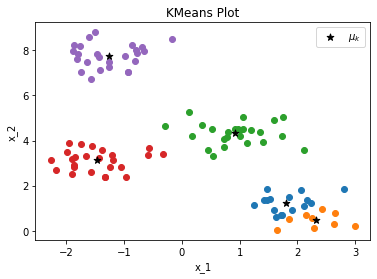

<Initialization 2>
Iteration 1 mean/center diff: 0.4262
Iteration 2 mean/center diff: 0.0000
----SSE 48.6338 after 2 iterations


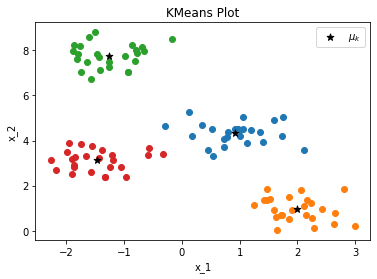

<Initialization 3>
Iteration 1 mean/center diff: 0.0000
----SSE 43.5113 after 1 iterations


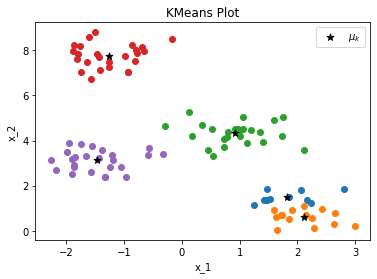

<Initialization 4>
Iteration 1 mean/center diff: 0.8073
Iteration 2 mean/center diff: 0.5498
Iteration 3 mean/center diff: 0.2296
Iteration 4 mean/center diff: 0.3605
Iteration 5 mean/center diff: 0.3440
Iteration 6 mean/center diff: 0.1208
Iteration 7 mean/center diff: 0.0000
----SSE 44.3316 after 7 iterations


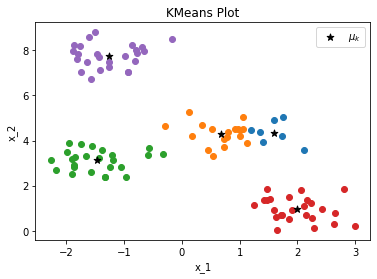

<Initialization 5>
Iteration 1 mean/center diff: 0.2888
Iteration 2 mean/center diff: 0.2522
Iteration 3 mean/center diff: 0.0000
----SSE 44.1281 after 3 iterations


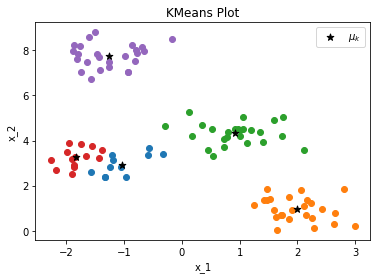



Optimal SSE: 43.5113
Optimal Mu: [[ 1.82279289  1.49358843]
 [ 2.10458645  0.61362557]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]]


array([[ 1.82279289,  1.49358843],
       [ 2.10458645,  0.61362557],
       [ 0.92578447,  4.32475792],
       [-1.26811733,  7.76378266],
       [-1.47935679,  3.11716896]])

In [21]:
%matplotlib inline

scratch_kmeans = ScratchKMeans(5, 5)
scratch_kmeans.fit(X, verbose=True)

## 【問題8】エルボー法の実装¶

In [22]:
def elbow_plot(X, max_clusters, n_init=5):

    x_values = np.arange(2, max_clusters)
    y_values = np.zeros(len(x_values))

    for i, n_clusters in enumerate(x_values):
        _, sse = ScratchKMeans(n_clusters, n_init).fit(X, return_sse=True)
        y_values[i] = sse

    plt.plot(x_values, y_values)
    plt.scatter(x_values, y_values)
    plt.title("Elbow Chart")
    plt.xlabel("n_clusters")
    plt.ylabel("SSE")
    plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


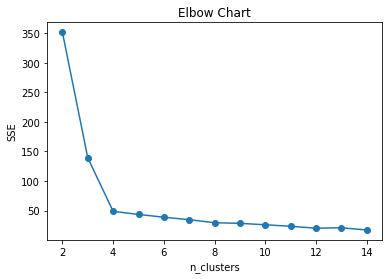

In [23]:
elbow_plot(X, 15)